## 19일차 강의 (2021.7.29)
# 머신러닝

### 연습문제
- 아이리스의 첫번째 샘플과 가장 거리가 가까운 점 3개를 뽑으시오. (argsort 함수 사용)
- 전체 샘플의 산점도(sepal length vs sepal width)를 그리고 첫번째 샘플과 가까운점 3개를 다른 색깔로 표시해 보시오. (plt.scatter 의 c 옵션 사용)
- 아이리스의 setosa 의 평균점을 구하고 이와 가장 가까운 3점을 뽑은 후, 위와 같이 산점도를 그려보시오.

### 텐서플로 설치
- 아나콘다 프롬프트를 띄운 다음
- pip install tensorflow==2.4
> import tensorflow as tf<br>
> from tensorflow import keras
- GPU 사용가능 확인
> from tensorflow.python.client import device_lib<br>
> device_lib.list_local_devices()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = df.iloc[:,:-1].values
X.shape

(150, 4)

In [5]:
x0 = X[0]
x0

array([5.1, 3.5, 1.4, 0.2])

In [7]:
dist = np.sqrt(((X-X[0])**2).sum(axis=1))
dist.shape

(150,)

In [9]:
np.argsort(dist) # 17번, 4번, 39번

array([  0,  17,   4,  39,  27,  28,  40,   7,  49,  21,  48,  26,  19,
        46,  35,  11,  10,  31,  36,  20,  43,  34,  37,   9,  23,   2,
         6,  29,   1,  30,  25,  16,  47,  24,  12,  45,  44,   5,  32,
        22,   3,  18,  42,  33,  38,  14,   8,  13,  15,  41,  98,  57,
        93,  79,  64,  81,  60,  80,  69,  59,  82,  88,  67,  92,  89,
        99,  95,  71,  53,  96,  62,  94,  61,  90,  97,  84,  74,  55,
        66,  85,  78, 106,  91,  75,  51,  87,  65,  73,  63,  58,  68,
        56,  54,  70, 138,  86, 126,  50, 127, 121,  76,  72, 123,  83,
       149, 119, 133,  52, 113, 101, 142,  77, 146, 110, 114, 147, 111,
       134, 137, 115, 141, 116, 148, 145, 103, 139, 128, 112, 132, 136,
       124, 140, 108, 104, 129, 120, 144, 143, 100, 102, 125, 130, 107,
       109, 135, 131, 105, 122, 117, 118], dtype=int64)

In [10]:
idx = np.argsort(dist)[1:4]
idx

array([17,  4, 39], dtype=int64)

In [11]:
near = X[idx]
near

array([[5.1, 3.5, 1.4, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2]])

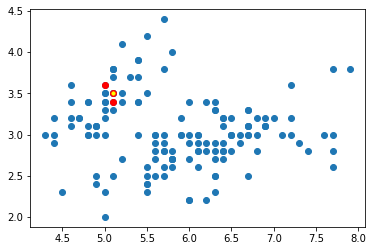

In [23]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(near[:,0], near[:,1], c='red')
plt.scatter(X[0,0], X[0,1], c='yellow', s=10)

In [24]:
mp = X[:50].mean(axis=0)
mp

array([5.006, 3.418, 1.464, 0.244])

In [27]:
dist = np.sqrt(((X-mp)**2).sum(axis=1))
idx = np.argsort(dist)[1:4]
idx

array([39, 49,  0], dtype=int64)

In [28]:
near = X[idx]
near

array([[5.1, 3.4, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2]])

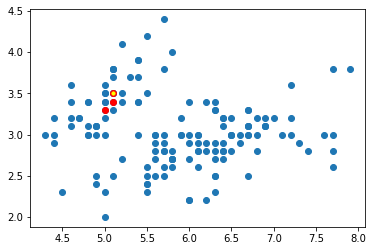

In [29]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(near[:,0], near[:,1], c='red')
plt.scatter(X[0,0], X[0,1], c='yellow', s=10)

In [30]:
m1 = X[:50].mean(axis=0)
m2 = X[50:100].mean(axis=0)
m3 = X[100:].mean(axis=0)

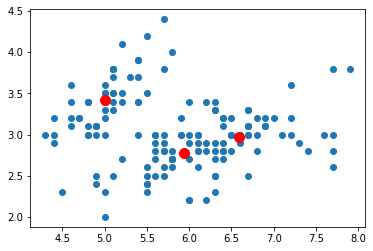

In [33]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(m1[0],m1[1], c='red', s=100)
plt.scatter(m2[0],m2[1], c='red', s=100)
plt.scatter(m3[0],m3[1], c='red', s=100)

## kNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(5)

In [37]:
X = df.iloc[:,:-1].values
X.shape

(150, 4)

In [38]:
y = np.array([0]*50 + [1]*50 + [2]*50) # label
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
model.fit(X, y) # 학습 => 패턴생성

KNeighborsClassifier()

In [42]:
model.predict([[1,1,1,1], [5,5,5,5]])

array([0, 2])

In [45]:
model.predict_proba([[1,1,1,1], [2,3,3,4]])

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2]])

In [48]:
pred_y = model.predict(X)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
idx = np.where(pred_y!=y)
idx

(array([ 70,  72,  83, 106, 119], dtype=int64),)

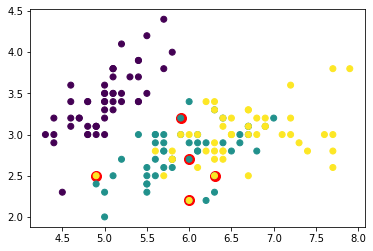

In [56]:
ps = X[idx]
plt.scatter(ps[:,0], ps[:,1], c='red', s=100)
plt.scatter(X[:,0], X[:,1], c=y)

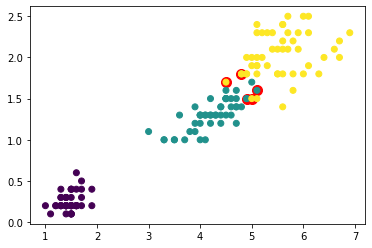

In [57]:
ps = X[idx]
plt.scatter(ps[:,2], ps[:,3], c='red', s=100)
plt.scatter(X[:,2], X[:,3], c=y)

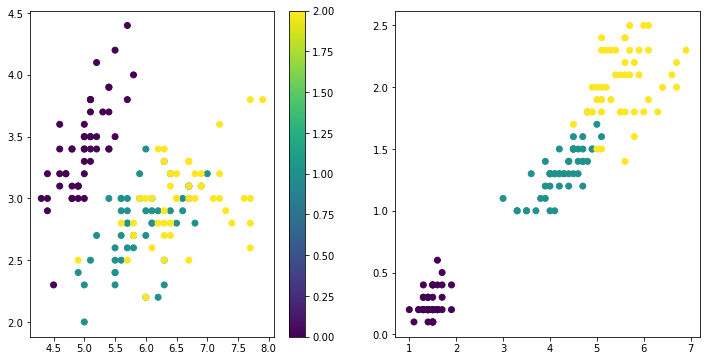

In [53]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,3], c=y)

In [59]:
model.score(X, y)

0.9666666666666667

In [61]:
# pred_y 과 y 를 비교해서 점수 계산
pred_y = model.predict(X)
pred_y==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [65]:
(pred_y==y).mean()

0.9666666666666667

In [66]:
(pred_y!=y).sum()

5

### 복습 문제
- 아이리스에서 setosa를 제외하고, 나머지 꽃들로 kNN을 적용한다 (샘플은 100개)
- X, y 를 잡으시오.
- 속성도 2가지로 제한한다 => sepal_length, sepal_width
- 이 때, X, y 를 잡으시오.
- kNN 을 적용해 보자

In [78]:
iris = pd.read_csv('iris.csv').iloc[:,:-1].values
iris.shape

(150, 4)

In [79]:
X = iris[50:]
y = np.array([0]*50 + [1]*50) # versicolor: 0, virginica: 1

X.shape, y.shape

((100, 4), (100,))

In [80]:
# 속성 2개로 제한
X = X[:, :2]
X.shape

(100, 2)

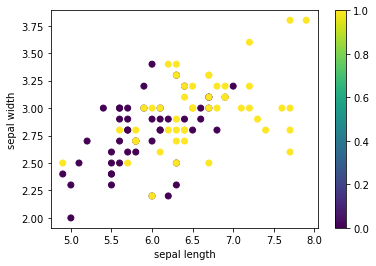

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.colorbar()

In [83]:
model = KNeighborsClassifier(5)
model.fit(X, y)

KNeighborsClassifier()

In [85]:
pred_y = model.predict(X)
pred_y

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [86]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
(pred_y!=y).sum()

23

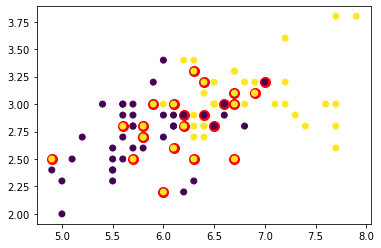

In [88]:
idx = np.where(pred_y!=y)[0]
ps = X[idx]
plt.scatter(ps[:,0], ps[:,1], c='red', s=100)
plt.scatter(X[:,0], X[:,1], c=y)

In [92]:
iris = pd.read_csv('iris.csv').iloc[:,:-1].values
X = iris[50:, :2]
y = np.array([0]*50 + [1]*50) # versicolor: 0, virginica: 1
X.shape, y.shape

((100, 2), (100,))

In [83]:
model = KNeighborsClassifier(5) # k=5
model.fit(X, y)

KNeighborsClassifier()

In [90]:
import mglearn # pip install mglearn

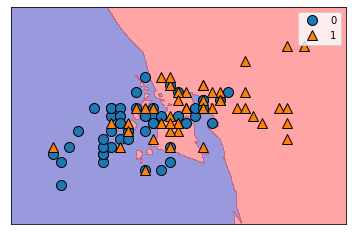

In [94]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend()

In [93]:
model.score(X, y)

0.77

In [ ]:
# k = 1, 3, 5, 7, 9

0.89


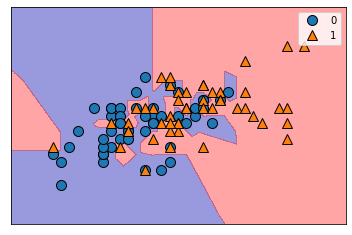

In [96]:
model = KNeighborsClassifier(1)
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend()

print(model.score(X, y))

0.77


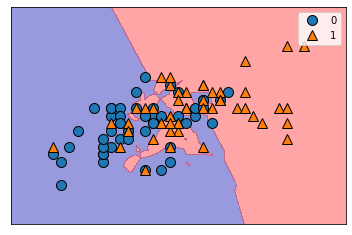

In [97]:
model = KNeighborsClassifier(3)
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend()

print(model.score(X, y))

0.5


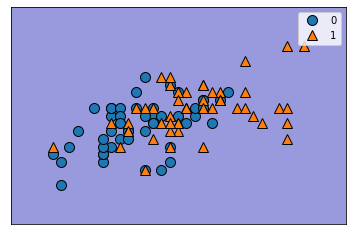

In [102]:
model = KNeighborsClassifier(100)
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend()

print(model.score(X, y))

In [103]:
X.shape

(100, 2)